# Importing Libraries

In [1]:
# Data manipulation/processing
import numpy as np
import pandas as pd
import kagglehub

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Import NN architectural libraries
import torch
from torch import nn
from torch.utils.data import DataLoader



# Exploratory Data Analysis (EDA)

In [28]:
# File path link
path = "/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv"

# Load into df
mobile_df = pd.read_csv(path)

# Column overview and null check
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


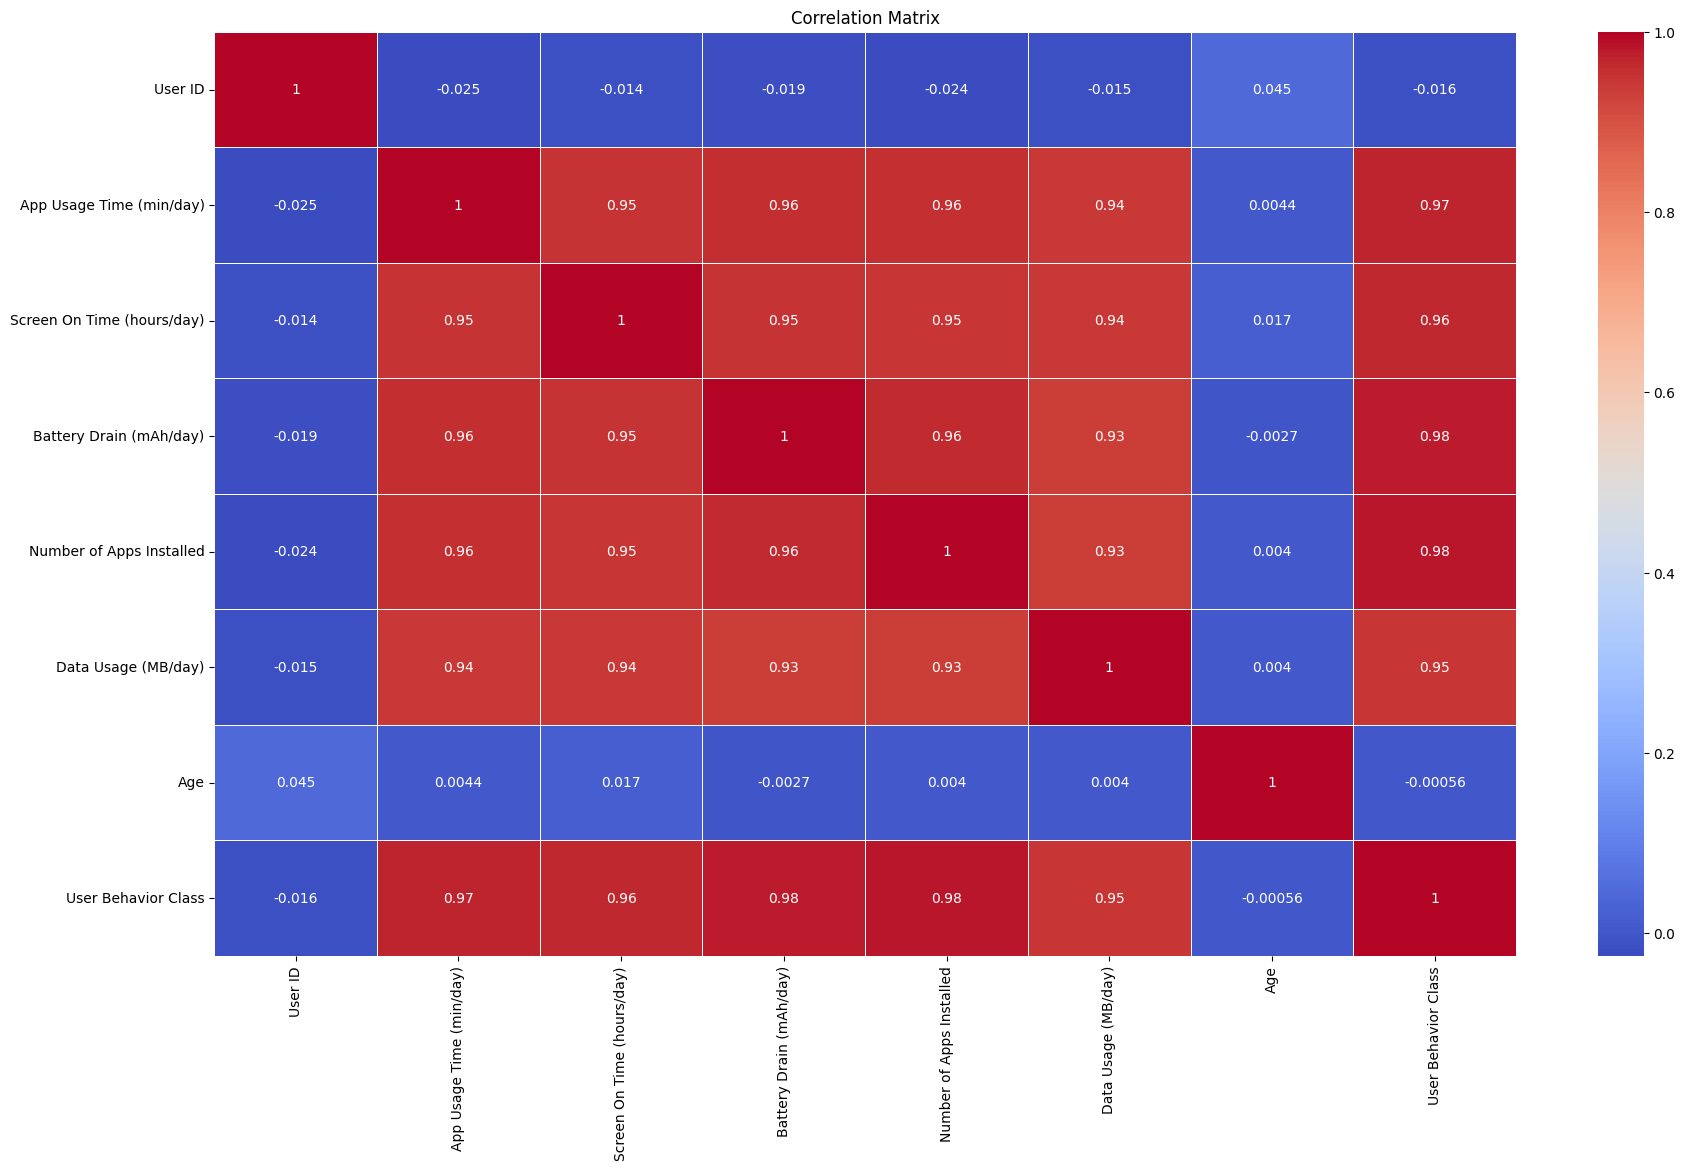

In [3]:
# Correletion Analysis

corr_mat = mobile_df.select_dtypes(include = np.number).corr()

# Plot matrix
plt.figure(figsize=(21, 12))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

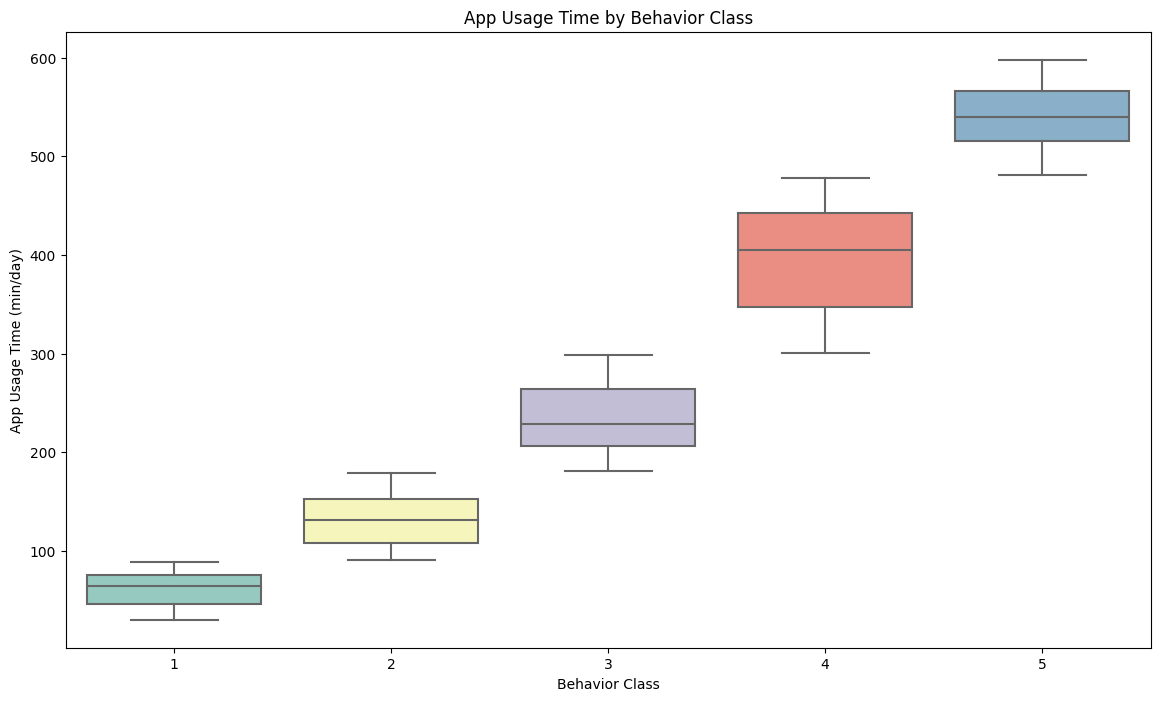

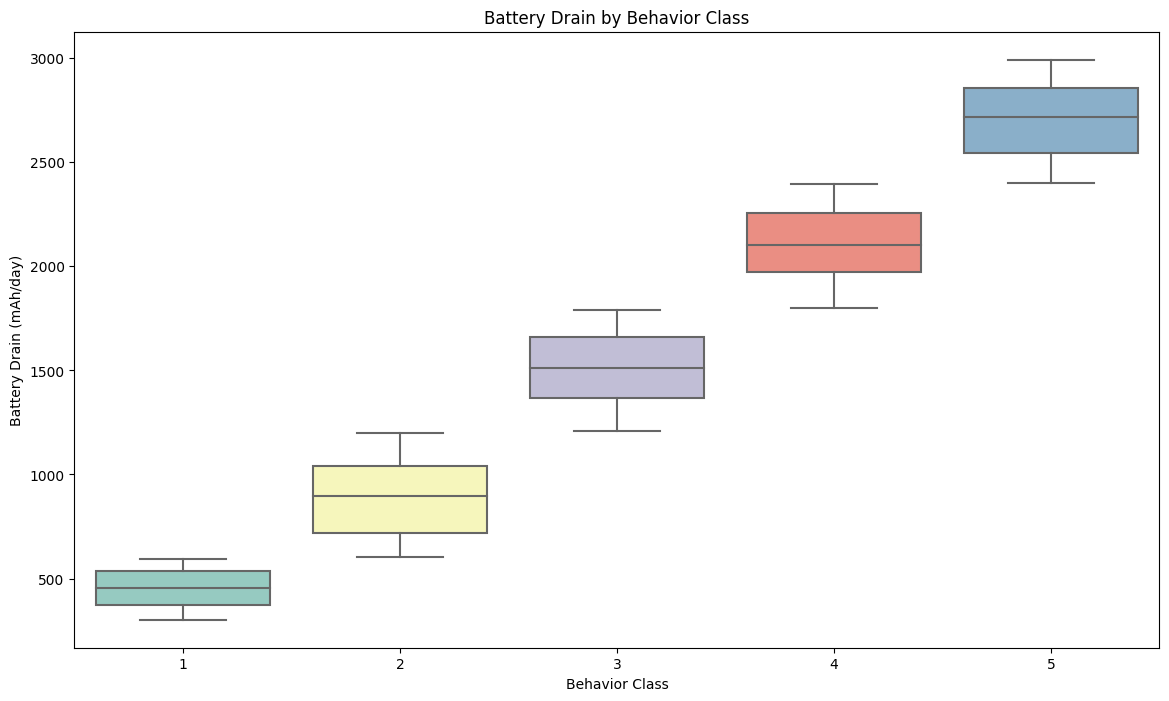

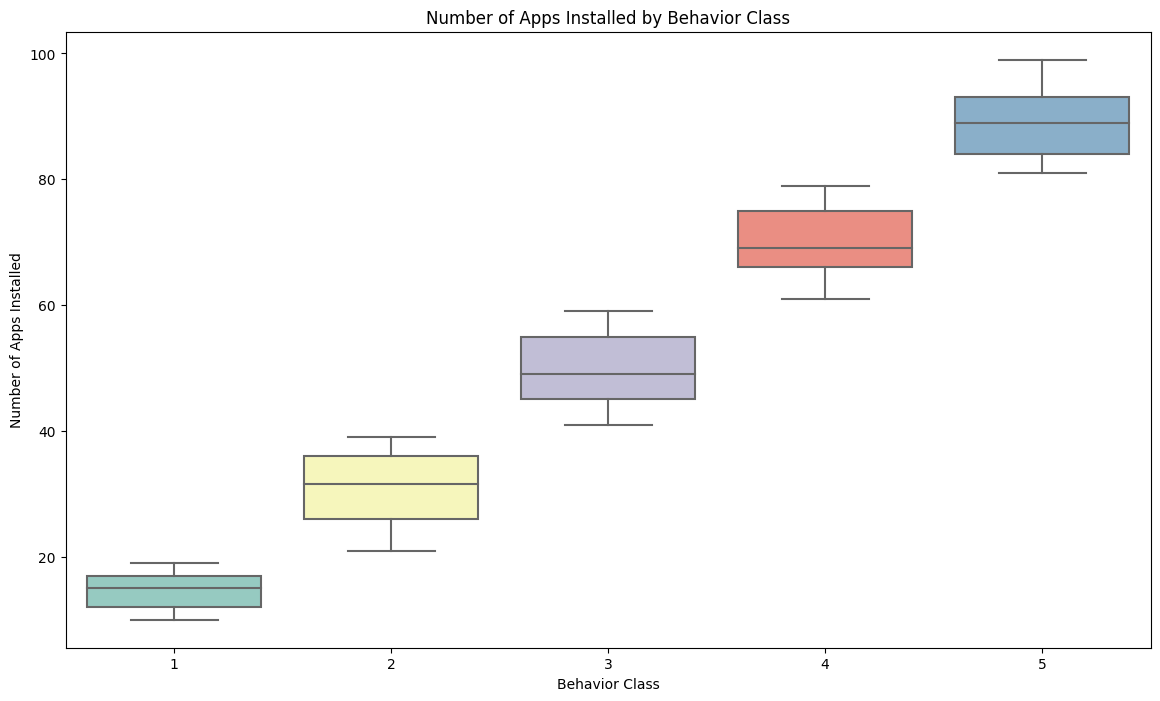

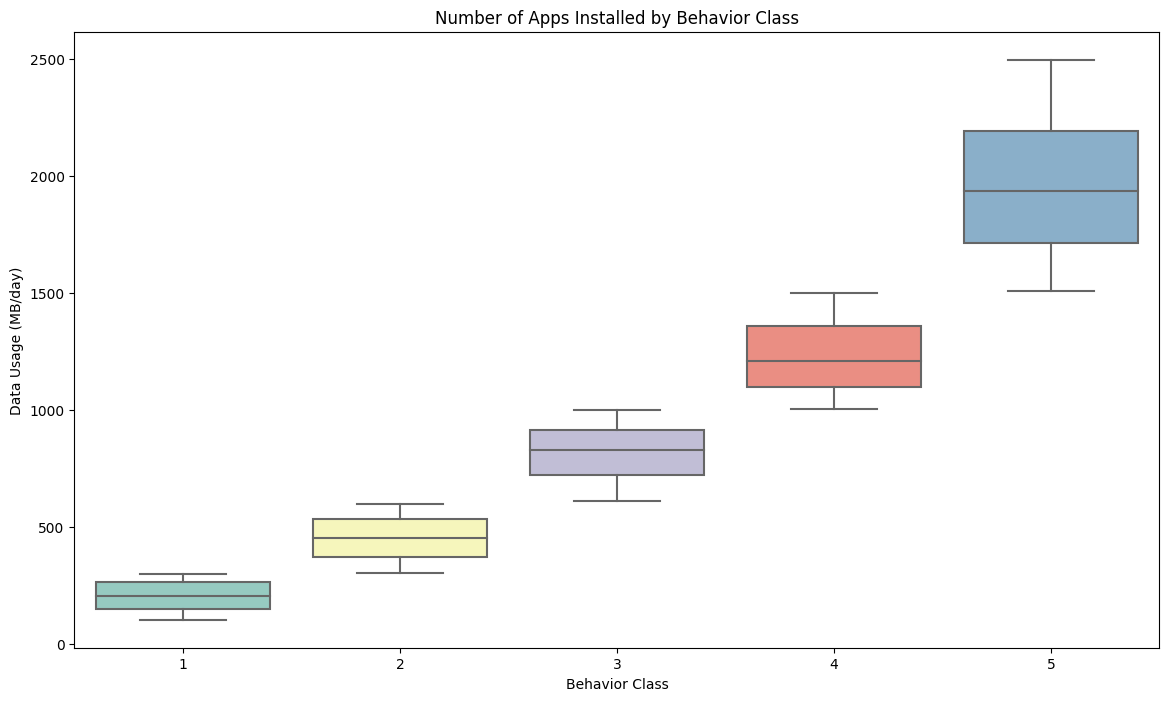

In [4]:
# Plot some numerical features against behavior class.

def plot(continuous_var, title):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x = 'User Behavior Class', y = continuous_var, data = mobile_df, palette = 'Set3')
    plt.title(title)
    plt.xlabel('Behavior Class')
    plt.ylabel(continuous_var)
    plt.show()

plot('App Usage Time (min/day)', 'App Usage Time by Behavior Class')
plot('Battery Drain (mAh/day)', 'Battery Drain by Behavior Class')
plot('Number of Apps Installed', 'Number of Apps Installed by Behavior Class')
plot('Data Usage (MB/day)', 'Number of Apps Installed by Behavior Class')

# Dependent variables show strong 1-D clustering


In [5]:
# Determine class distribution of behavior variable

mobile_df.groupby('User Behavior Class')['User Behavior Class'].count()

# Relatively uniform, no need for SMOTE

User Behavior Class
1    136
2    146
3    143
4    139
5    136
Name: User Behavior Class, dtype: int64

# Data Pre-processing

In [32]:
# Isolate features
X = mobile_df.drop(columns = ['User ID', 'Gender', 'User Behavior Class'])

# One hot encoding of 'Device Model' and 'Operating System'
X = pd.get_dummies(X, columns=['Device Model', 'Operating System'], drop_first=True)

# One hot encoding for target variable
y = mobile_df['User Behavior Class']
y = pd.get_dummies(y, columns=['User Behavior Class'])

X, y

(     App Usage Time (min/day)  Screen On Time (hours/day)  \
 0                         393                         6.4   
 1                         268                         4.7   
 2                         154                         4.0   
 3                         239                         4.8   
 4                         187                         4.3   
 ..                        ...                         ...   
 695                        92                         3.9   
 696                       316                         6.8   
 697                        99                         3.1   
 698                        62                         1.7   
 699                       212                         5.4   
 
      Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
 0                       1872                        67                 1122   
 1                       1331                        42                  944   
 2            

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS
0,393,6.4,1872,67,1122,40,4,False,False,False,False,False
1,268,4.7,1331,42,944,47,3,True,False,False,False,False
2,154,4.0,761,32,322,42,2,False,False,True,False,False
3,239,4.8,1676,56,871,20,3,False,False,False,False,False
4,187,4.3,1367,58,988,31,3,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22,2,False,False,False,True,True
696,316,6.8,1965,68,1201,59,4,False,False,True,False,False
697,99,3.1,942,22,457,50,2,False,False,False,False,False
698,62,1.7,431,13,224,44,1,False,True,False,False,False


## Train/Test Split

In [7]:
# Set batch size

batch_size = 64

700
